In [82]:
import pandas as pd
import numpy as np
import seaborn
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
melb = pd.read_csv('../datasets/melbourne_housing_FULL.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [53]:
melb = (
    melb 
    .drop(columns = ['Address', 
                     'Method', 
                     'SellerG', 
                     'Date', 
                     'Postcode', 
                     'YearBuilt', 
                     'Type', 
                     'Lattitude',
                    'Longtitude',
                     'Regionname',
                     'Suburb',
                     'CouncilArea'
                    ])
)
melb.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [13]:
melb.isna().sum()

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

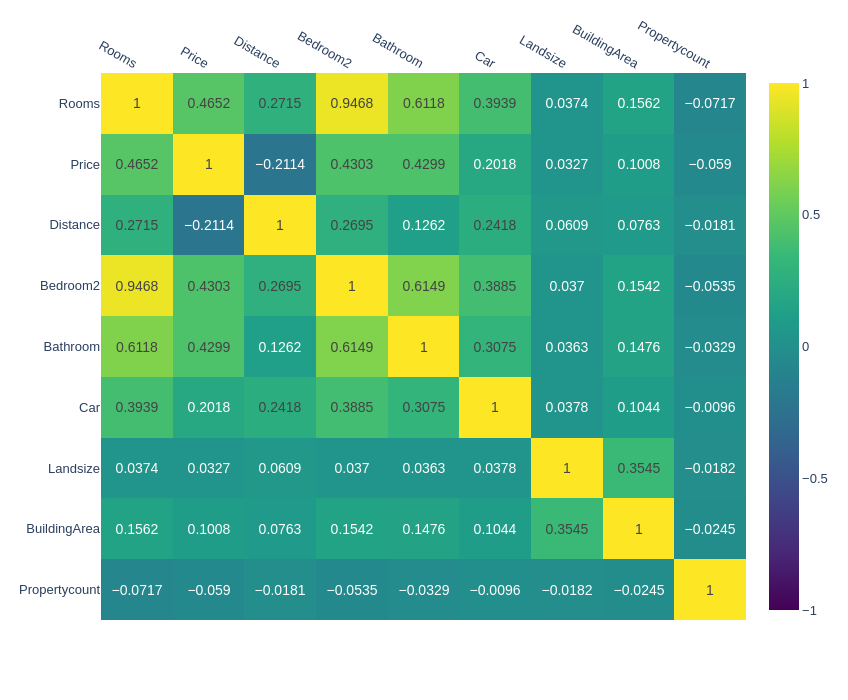

In [48]:
fig = (
        px.imshow(melb.corr().round(4), 
                text_auto = True, 
                height = 700, 
                aspect = 'auto', 
                color_continuous_scale='Viridis',
                color_continuous_midpoint=0
    )
)
fig.update_xaxes(side = 'top')
fig.update_traces(textfont = {'size': 14})
fig.update_coloraxes(showscale=True)
fig.update_layout(font_size = 13)
fig.show()

In [54]:
# remove variables weakly correlated with price
melb = (
    melb
    .drop(columns = ['Bedroom2',
                    'Landsize',
                    'Propertycount'])
)
melb.head()

,Rooms,Price,Distance,Bathroom,Car,BuildingArea
0,2,NaN,2.5,1.0,1.0,NaN
1,2,1480000.0,2.5,1.0,1.0,NaN
2,2,1035000.0,2.5,1.0,0.0,79.0
3,3,NaN,2.5,2.0,1.0,NaN
4,3,1465000.0,2.5,2.0,0.0,150.0


In [55]:
# remove variables with too big count of missing values
melb.isna().sum()

Rooms               0
Price            7610
Distance            1
Bathroom         8226
Car              8728
BuildingArea    21115
dtype: int64

In [57]:
melb = (
    melb
    .drop(columns = ['BuildingArea'])
)
melb.head()

,Rooms,Price,Distance,Bathroom,Car
0,2,NaN,2.5,1.0,1.0
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
3,3,NaN,2.5,2.0,1.0
4,3,1465000.0,2.5,2.0,0.0


In [63]:
# Fill missing values with the mean where appropriate
melb = (
    melb
    .assign(Car = lambda x: x['Car'].fillna(x['Car'].mean()))
)
melb.head()

,Rooms,Price,Distance,Bathroom,Car
0,2,NaN,2.5,1.0,1.0
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
3,3,NaN,2.5,2.0,1.0
4,3,1465000.0,2.5,2.0,0.0


In [65]:
#Drop remaining missing values on a row-by-row basis
melb = (
    melb
    .dropna(axis = 0, how = 'any')
)
melb.head()

,Rooms,Price,Distance,Bathroom,Car
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
4,3,1465000.0,2.5,2.0,0.0
5,3,850000.0,2.5,2.0,1.0
6,4,1600000.0,2.5,1.0,2.0


In [68]:
melb.count()

Rooms       20800
Price       20800
Distance    20800
Bathroom    20800
Car         20800
dtype: int64

In [69]:
X = melb[['Rooms', 'Distance', 'Bathroom', 'Car']]
y = melb['Price']

>Let’s also shuffle and sub-divide the data into training and test sets using a standard 70/30 split. To make the results replicable in the future, you also need to control how the data is partitioned using a random seed number set to “10” for this exercise.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle = True)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
print(f'model intercept_ = {model.intercept_}')

model intercept_ = 282725.315677935


> model results:

In [73]:
pd.DataFrame(model.coef_, index = X.columns, columns = ['Coefficints'])

,Coefficints
Rooms,269450.107900
Distance,-37787.766224
Bathroom,207173.059271
Car,47417.171595


In [111]:
#8. Predict 
new_house = np.array([
    2, #Rooms
    2.5, #Distance
    1, #Bathroom
    1, #Car
]).reshape(1, -1)


new_house = pd.DataFrame(new_house, columns = X_train.columns)

new_house_predict = model.predict(new_house)
print(new_house_predict)

[981746.34678384]


## Оценка
> Используя среднюю абсолютную ошибку из Scikit-learn, мы можем сравнить разницу между ожидаемой ценой, предсказанной моделью для тестового набора, и фактической ценой.

In [112]:
prediction = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, prediction))

363782.94232363405


> Средняя абсолютная ошибка составляет 363782,9423236326, что означает, что модель неверно рассчитала фактическую стоимость объекта в среднем на 363 782 доллара.

>Такой относительно высокий уровень ошибок не является неожиданным, поскольку мы удалили 16 переменных из исходного набора данных. Например, переменная «Тип» (дом, блок или квартира) является основным показателем стоимости дома. Однако, поскольку эта переменная имеет нечисловое выражение, мы не стали включать ее в нашу модель. Однако Вы можете перестроить модель и преобразовать Type в числовые переменные с помощью одноточечного кодирования.

>Стоит отметить, что, хотя линейная регрессия работает очень быстро, она не отличается точностью предсказаний.

## Include Type in our model

In [113]:
melb = pd.read_csv('../datasets/melbourne_housing_FULL.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [114]:
melb = (
    melb 
    .drop(columns = ['Address', 
                     'Method', 
                     'SellerG', 
                     'Date', 
                     'Postcode', 
                     'YearBuilt', 
                     'Lattitude',
                    'Longtitude',
                     'Regionname',
                     'Suburb',
                     'CouncilArea'
                    ])
)
melb.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,h,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,u,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [126]:
type_to_num = dict(zip(list(melb['Type'].unique()), np.arange(3)))
type_to_num

{'h': 0, 'u': 1, 't': 2}

In [130]:
melb = (
    melb
    .assign(Type = lambda x: x['Type'].map(type_to_num))
)
melb.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,0,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,0,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,1,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


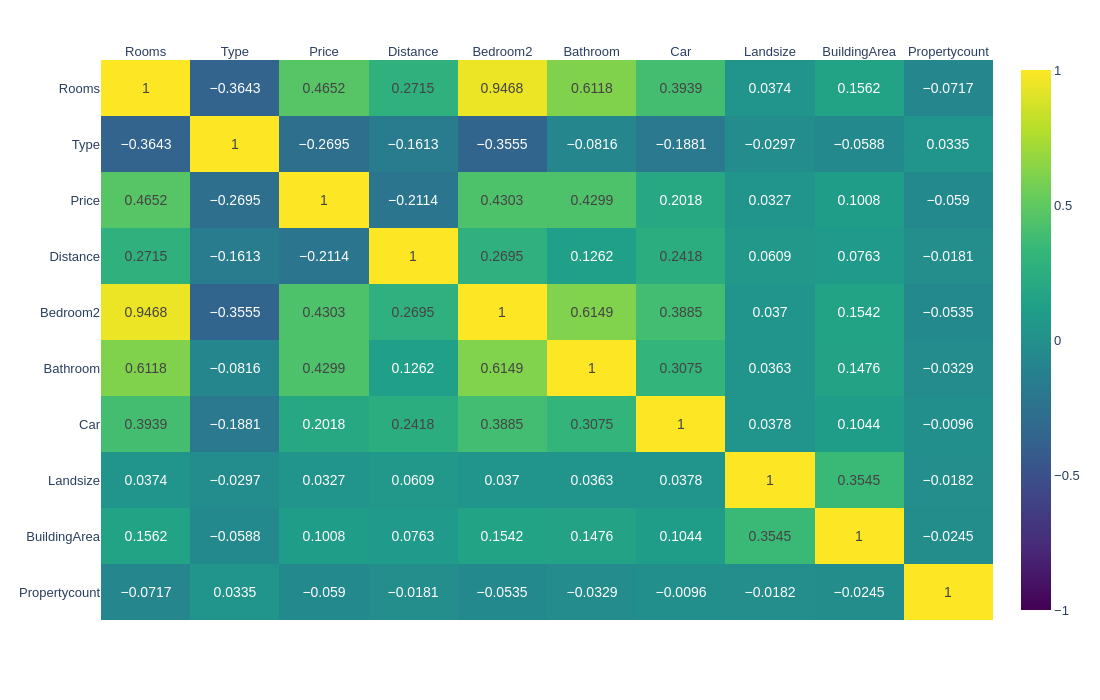

In [131]:
fig = (
        px.imshow(melb.corr().round(4), 
                text_auto = True, 
                height = 700, 
                aspect = 'auto', 
                color_continuous_scale='Viridis',
                color_continuous_midpoint=0
    )
)
fig.update_xaxes(side = 'top')
fig.update_traces(textfont = {'size': 14})
fig.update_coloraxes(showscale=True)
fig.update_layout(font_size = 13)
fig.show()

In [132]:
melb = (
    melb
    .drop(columns = ['Bedroom2',
                    'Landsize',
                    'Propertycount'])
)
melb.head()

,Rooms,Type,Price,Distance,Bathroom,Car,BuildingArea
0,2,0,NaN,2.5,1.0,1.0,NaN
1,2,0,1480000.0,2.5,1.0,1.0,NaN
2,2,0,1035000.0,2.5,1.0,0.0,79.0
3,3,1,NaN,2.5,2.0,1.0,NaN
4,3,0,1465000.0,2.5,2.0,0.0,150.0


In [133]:
# remove variables with too big count of missing values
melb.isna().sum()

Rooms               0
Type                0
Price            7610
Distance            1
Bathroom         8226
Car              8728
BuildingArea    21115
dtype: int64

In [134]:
melb = (
    melb
    .drop(columns = ['BuildingArea'])
)
melb.head()

,Rooms,Type,Price,Distance,Bathroom,Car
0,2,0,NaN,2.5,1.0,1.0
1,2,0,1480000.0,2.5,1.0,1.0
2,2,0,1035000.0,2.5,1.0,0.0
3,3,1,NaN,2.5,2.0,1.0
4,3,0,1465000.0,2.5,2.0,0.0


In [135]:
# Fill missing values with the mean where appropriate
melb = (
    melb
    .assign(Car = lambda x: x['Car'].fillna(x['Car'].mean()))
)
melb.head()

,Rooms,Type,Price,Distance,Bathroom,Car
0,2,0,NaN,2.5,1.0,1.0
1,2,0,1480000.0,2.5,1.0,1.0
2,2,0,1035000.0,2.5,1.0,0.0
3,3,1,NaN,2.5,2.0,1.0
4,3,0,1465000.0,2.5,2.0,0.0


In [136]:
#Drop remaining missing values on a row-by-row basis
melb = (
    melb
    .dropna(axis = 0, how = 'any')
)
melb.head()

,Rooms,Type,Price,Distance,Bathroom,Car
1,2,0,1480000.0,2.5,1.0,1.0
2,2,0,1035000.0,2.5,1.0,0.0
4,3,0,1465000.0,2.5,2.0,0.0
5,3,0,850000.0,2.5,2.0,1.0
6,4,0,1600000.0,2.5,1.0,2.0


In [137]:
melb.count()

Rooms       20800
Type        20800
Price       20800
Distance    20800
Bathroom    20800
Car         20800
dtype: int64

In [138]:
X = melb[['Rooms', 'Type', 'Distance', 'Bathroom', 'Car']]
y = melb['Price']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle = True)

In [140]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [141]:
print(f'model intercept_ = {model.intercept_}')

model intercept_ = 497880.33732038084


In [142]:
pd.DataFrame(model.coef_, index = X.columns, columns = ['Coefficints'])

,Coefficints
Rooms,206803.806134
Type,-207433.437097
Distance,-38931.503209
Bathroom,250724.959307
Car,38796.490843


In [143]:
prediction = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, prediction))

352442.365424567
